In [2]:
import numpy as np
from IPython.display import display, Math

def cosh(x):
    return np.cosh(x)

def sinh(x):
    return np.sinh(x)

def tanh(x):
    return np.tanh(x)

def arcosh(x):
    return np.arccosh(x)

lamb = 0.69
n = 10
p = 8
q = 2


# print('display:')
# print('num:')
# display(num_display)
# print('denom')
# display(denom_display)
# print('c_analytical_start')
# display(c_analytical_display)


[0.2458927355659026, 0.3676813425605156, 0.1762878285419637, 0.0722081955895593, 0.0038926755305594696, -0.06249483502764004, -0.15983551256272455, -0.3363413772209034, -0.1841426992165476, -0.12314835376068527]
[0.2458927355659026, 0.3676813425605156, 0.1762878285419637, 0.0722081955895593, 0.0038926755305594696, -0.06249483502764004, -0.15983551256272455, -0.3363413772209034, -0.1841426992165476, -0.12314835376068527]
[0.2458927355659026, 0.3676813425605156, 0.1762878285419637, 0.0722081955895593, 0.0038926755305594696, -0.06249483502764004, -0.15983551256272455, -0.3363413772209034, -0.1841426992165476, -0.12314835376068527]


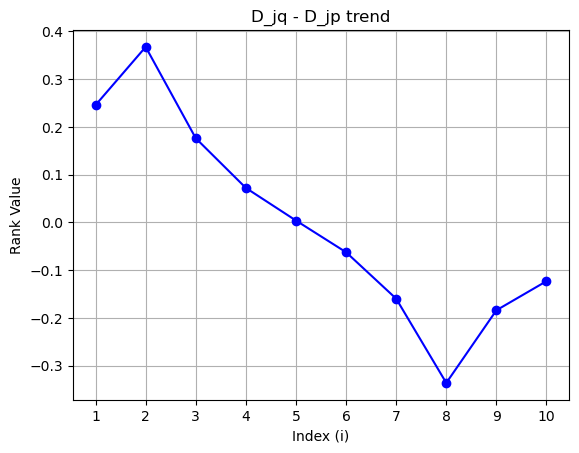

In [3]:


def D_ij_analytical_case_1b(i, j):
    num = 2 * cosh( (i-1/2) * lamb ) * cosh( (n-(j-1/2)) * lamb) * tanh(lamb/2)
    denom = sinh(lamb * n)
    return num/denom

def D_ij_analytical_case_2b(i, j):
    num = 2 * cosh( (j-1/2) * lamb ) * cosh( (n-(i-1/2)) * lamb) * tanh(lamb/2)
    denom = sinh(lamb * n)
    return num/denom

def D_ij_analytical_case_3c_minus_delta(i, j):
    return ( ( 2 * cosh((i-1/2)*lamb) * cosh((n-i+1/2)*lamb) ) / sinh(lamb*n) ) * tanh(lamb/2)

def D_ij_analytical_sol_trend2(i, j):
        if i < j:
            return D_ij_analytical_case_1b(i, j)
        elif i > j: 
            return D_ij_analytical_case_2b(i, j)
        elif i == j:
            return D_ij_analytical_case_3c_minus_delta(i, j)
        
def D_ij_analytical_sol_trend3(i, j):
    num = 2 * cosh( (min(i,j)-1/2) * lamb ) * cosh( (n-(max(i,j)-1/2)) * lamb) * tanh(lamb/2)
    denom = sinh(lamb * n)
    return num/denom

def D_ij_trend_array():        
    array = []
    for j in range (1, n+1):
        array.append(D_ij_analytical_sol_trend2(j,q) - D_ij_analytical_sol_trend2(j,p))
    print(array)
    return array

trend_array = D_ij_trend_array()

import matplotlib.pyplot as plt

print(D_ij_trend_array())

index = list(range(1,n+1))
plt.plot(index, trend_array, marker='o', linestyle='-', color='b')
plt.title('D_jq - D_jp trend')
plt.xlabel('Index (i)')
plt.ylabel('Rank Value')
plt.grid(True)
plt.xticks(index)  # Set the ticks to match the index values
plt.show()


In [4]:
D_ij_analytical_sol_trend2(2,2)

0.37382257470672975

In [5]:
D_ij_analytical_sol_trend3(2,2)

0.3738225747067297

In [6]:
#Checking c_denom term after simplifying wiht D_ij_constant

#parameters
k_o = 0.4
k_d = 0
k_s = 1
alpha_prime = k_o/k_s
alpha = 1 - 2 * ((k_o-k_d)/(k_s-k_d))
p = 5
q = 2
n = 7
j = 5
lamb = np.arccosh(1 / (1-alpha))
print('lamb:', lamb)
print('alpha:', alpha)
print('alpha_prime:', alpha_prime)

#check that alpha = 1 - 2 * alpha_prime
assert alpha == 1 - 2 * alpha_prime
print('1 - 2 * alpha_prime =' , 1 - 2 * alpha_prime)

#check that alpha_prime = -1 / (2 * cosh(lamb))
assert alpha_prime == (1 - alpha)/2
assert alpha == 1 - 1/cosh(lamb)
assert alpha_prime == (1 / (2 * cosh(lamb)))
#for the purpose of checking values
D_sim = (
        (cosh((q - 1 / 2) * lamb) * sinh((n - ((p + q) / 2 - 1 / 2)) * lamb)) +
        (cosh((n - p + 1 / 2) * lamb) * sinh(((p + q) / 2 - 1 / 2) * lamb))
    )

c_denom_2 = 1 - 2 * alpha_prime - 4 * alpha_prime * (tanh(lamb/2) * sinh((q-p)/2) / sinh(lamb * n) * D_sim)
print('c_denom_2:', c_denom_2)

c_denom_2_simp = 2 * alpha_prime * (- 1 + cosh(lamb) - 2 * (tanh(lamb/2) * sinh((q-p)/2) / sinh(lamb * n) * D_sim))
print('c_denom_2_simp:', c_denom_2_simp)



lamb: 0.6931471805599453
alpha: 0.19999999999999996
alpha_prime: 0.4
1 - 2 * alpha_prime = 0.19999999999999996
c_denom_2: 0.6287772523332891
c_denom_2_simp: 0.6287772523332892


In [7]:
#verifying c_denom term

denom = ( 1 - 2*alpha_prime 
- (4 * (1 / (2 * cosh(lamb))) * ( (tanh(lamb / 2)) / sinh(lamb * n) ) * sinh( ((q-p)/2) * lamb) * D_sim ) 
)
print('denom:', denom)

denom_1 = (1/(2*cosh(lamb))) * (2* cosh(lamb) - 2 - 4 * ( (tanh(lamb / 2)) / sinh(lamb * n) ) * sinh( ((q-p)/2) * lamb) * D_sim)
print('denom_1:', denom_1)

assert alpha_prime == 1 / (2 * cosh(lamb))

denom_2 = 2 * alpha_prime * (cosh(lamb) - 1 - 2 * (tanh(lamb/2) * sinh((q-p)/2 * lamb) / sinh(lamb * n) * D_sim))
print('denom_2:', denom_2)

# assert tanh(lamb/2) == (cosh(lamb) - 1) / sinh(lamb)

denom_3 = (2 * alpha_prime) * (tanh(lamb/2) / sinh(lamb*n)) * (sinh(lamb) * sinh(lamb * n) - 2 * sinh((q-p)/2 * lamb) * D_sim)
print('denom_3:', denom_3)

c_denom_constant = 2 * alpha_prime * (tanh(lamb / 2) / sinh(lamb * n))
c_denom_2part = sinh(lamb)*sinh(lamb * n) - 2 * sinh((q-p)/2 * lamb) * D_sim
c_denom2 = c_denom_constant * c_denom_2part
print('c_denom2:', c_denom2)

denom: 0.4491851309284013
denom_1: 0.4491851309284014
denom_2: 0.4491851309284014
denom_3: 0.4491851309284014
c_denom2: 0.4491851309284014


In [8]:
num = 1 + (
    (sinh(((n + 1) / 2 - q) * lamb) - sinh(((n + 1) / 2 - p) * lamb)) 
    / (sinh(((n + 1) / 2) * lamb) - sinh(((n - 1) / 2) * lamb))
)

#actually a apart of the denominator
c_num_final = ( sinh((n+1)/2 * lamb) - sinh((n-1)/2 * lamb)
                - sinh( (((n+1)/2 - p) * lamb) ) + sinh( (((n+1)/2 - q) * lamb) )
)

c_num_part = sinh((n+1)/2 * lamb) - sinh((n-1)/2 * lamb)
c_final = c_num_final / c_num_part

print('num:', num)
print('c_final:', c_final) 

num: 1.6511627906976745
c_final: 1.6511627906976745


In [9]:
D_ij_constant = 2 * tanh(lamb/2) / sinh(lamb * n)

def D_ij_part(i,j):
    return D_ij_analytical_sol_trend3(i, j) / D_ij_constant

# assert ( D_ij_analytical_sol_trend2(j, p) - D_ij_analytical_sol_trend2(j, q) ) == D_ij_constant * (D_ij_part(j, p) - D_ij_part(j, q)) 

In [10]:
c = num/denom

r_diff_original = c * alpha_prime * (D_ij_analytical_sol_trend2(j, q) - D_ij_analytical_sol_trend2(j, p))
print('r_diff_original:', r_diff_original)

r_diff = c_final * (1 / (c_denom_constant * c_denom_2part)) * alpha_prime * (D_ij_part(j, q) - D_ij_part(j, p)) * D_ij_constant

r_diff_final = ( c_final / c_denom_2part ) * (D_ij_part(j, q) - D_ij_part(j, p))

print('r_diff:', r_diff)
print('r_diff_final:', r_diff_final)

print('Proof Done')


r_diff_original: -0.4353738658879969
r_diff: -0.43537386588799676
r_diff_final: -0.4353738658879968
Proof Done


In [13]:
print(c)
print(alpha_prime)

3.6759070525886677
0.4


In [15]:
D_ij_analytical_sol_trend2(j, q)

0.04834279436000734

In [16]:
D_ij_analytical_sol_trend2(j, p)

0.3444424098150523